In [1]:
import scanpy as sc

## Step 1: Filtering

In [2]:
# Read 10x dataset
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
#pp.recipe_zheng17(adata[, n_top_genes, log, …])
adata_filtered = sc.pp.recipe_zheng17(adata, copy = True)
print(adata_filtered)

AnnData object with n_obs × n_vars = 11843 × 999
    obs: 'n_counts_all'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'mean', 'std'
    uns: 'log1p'


In [4]:
#perform PCA on the filtered and unfiltered data
pca_unfiltered = sc.tl.pca(adata, copy = True)
pca_filtered = sc.tl.pca(adata_filtered, copy = True)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


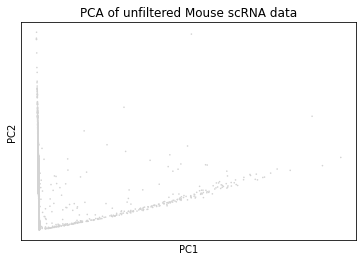

In [5]:
#PCA plot of unfiltered scRNA data
sc.pl.pca(pca_unfiltered, title = 'PCA of unfiltered Mouse scRNA data')

... storing 'feature_types' as categorical
... storing 'genome' as categorical


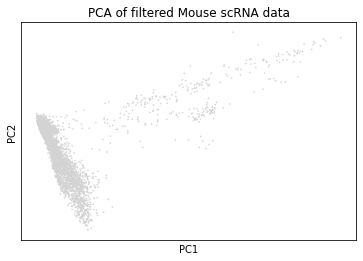

In [6]:
#PCA plot of filtered 
sc.pl.pca(pca_filtered, title = "PCA of filtered Mouse scRNA data")

## Step 2: Clustering

In [7]:
#create a neighborhood graph to use for clustering analysis
neighbors = sc.pp.neighbors(adata_filtered, use_rep='X', copy = True)
clusters = sc.tl.leiden(neighbors, copy = True)
print(clusters)

AnnData object with n_obs × n_vars = 11843 × 999
    obs: 'n_counts_all', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'mean', 'std'
    uns: 'log1p', 'neighbors', 'leiden'
    obsp: 'distances', 'connectivities'


In [8]:
#Make a tSNE plot
tsne_data = sc.tl.tsne(clusters, copy = True)

         Falling back to preprocessing with `sc.pp.pca` and default params.


... storing 'feature_types' as categorical
... storing 'genome' as categorical


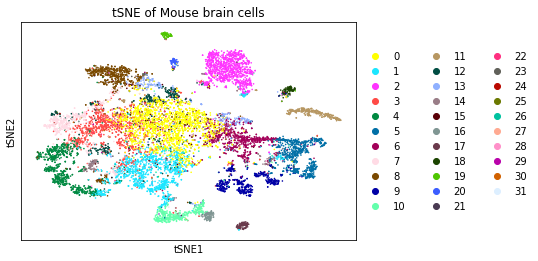

In [9]:
sc.pl.tsne(tsne_data,color = ['leiden'], title = "tSNE of Mouse brain cells")

In [10]:
#make a UMAP plot
umap_data = sc.tl.umap(clusters, copy = True)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


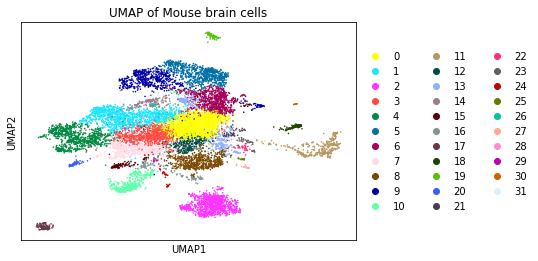

In [11]:
sc.pl.umap(umap_data,color = ['leiden'], title = "UMAP of Mouse brain cells")

## Step 3: Distinguishing genes

In [12]:
#identify genes in each cluster using t-test
ranked_ttest_genes = sc.tl.rank_genes_groups(clusters, 'leiden', method='t-test', copy = True)
print(ranked_ttest_genes)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


AnnData object with n_obs × n_vars = 11843 × 999
    obs: 'n_counts_all', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'mean', 'std'
    uns: 'log1p', 'neighbors', 'leiden', 'rank_genes_groups'
    obsp: 'distances', 'connectivities'


/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


In [13]:
#identify genes in each cluster using logistic regression
ranked_logreg_genes = sc.tl.rank_genes_groups(clusters, 'leiden', method='logreg', copy = True)
print(ranked_logreg_genes)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


AnnData object with n_obs × n_vars = 11843 × 999
    obs: 'n_counts_all', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'mean', 'std'
    uns: 'log1p', 'neighbors', 'leiden', 'rank_genes_groups'
    obsp: 'distances', 'connectivities'


/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


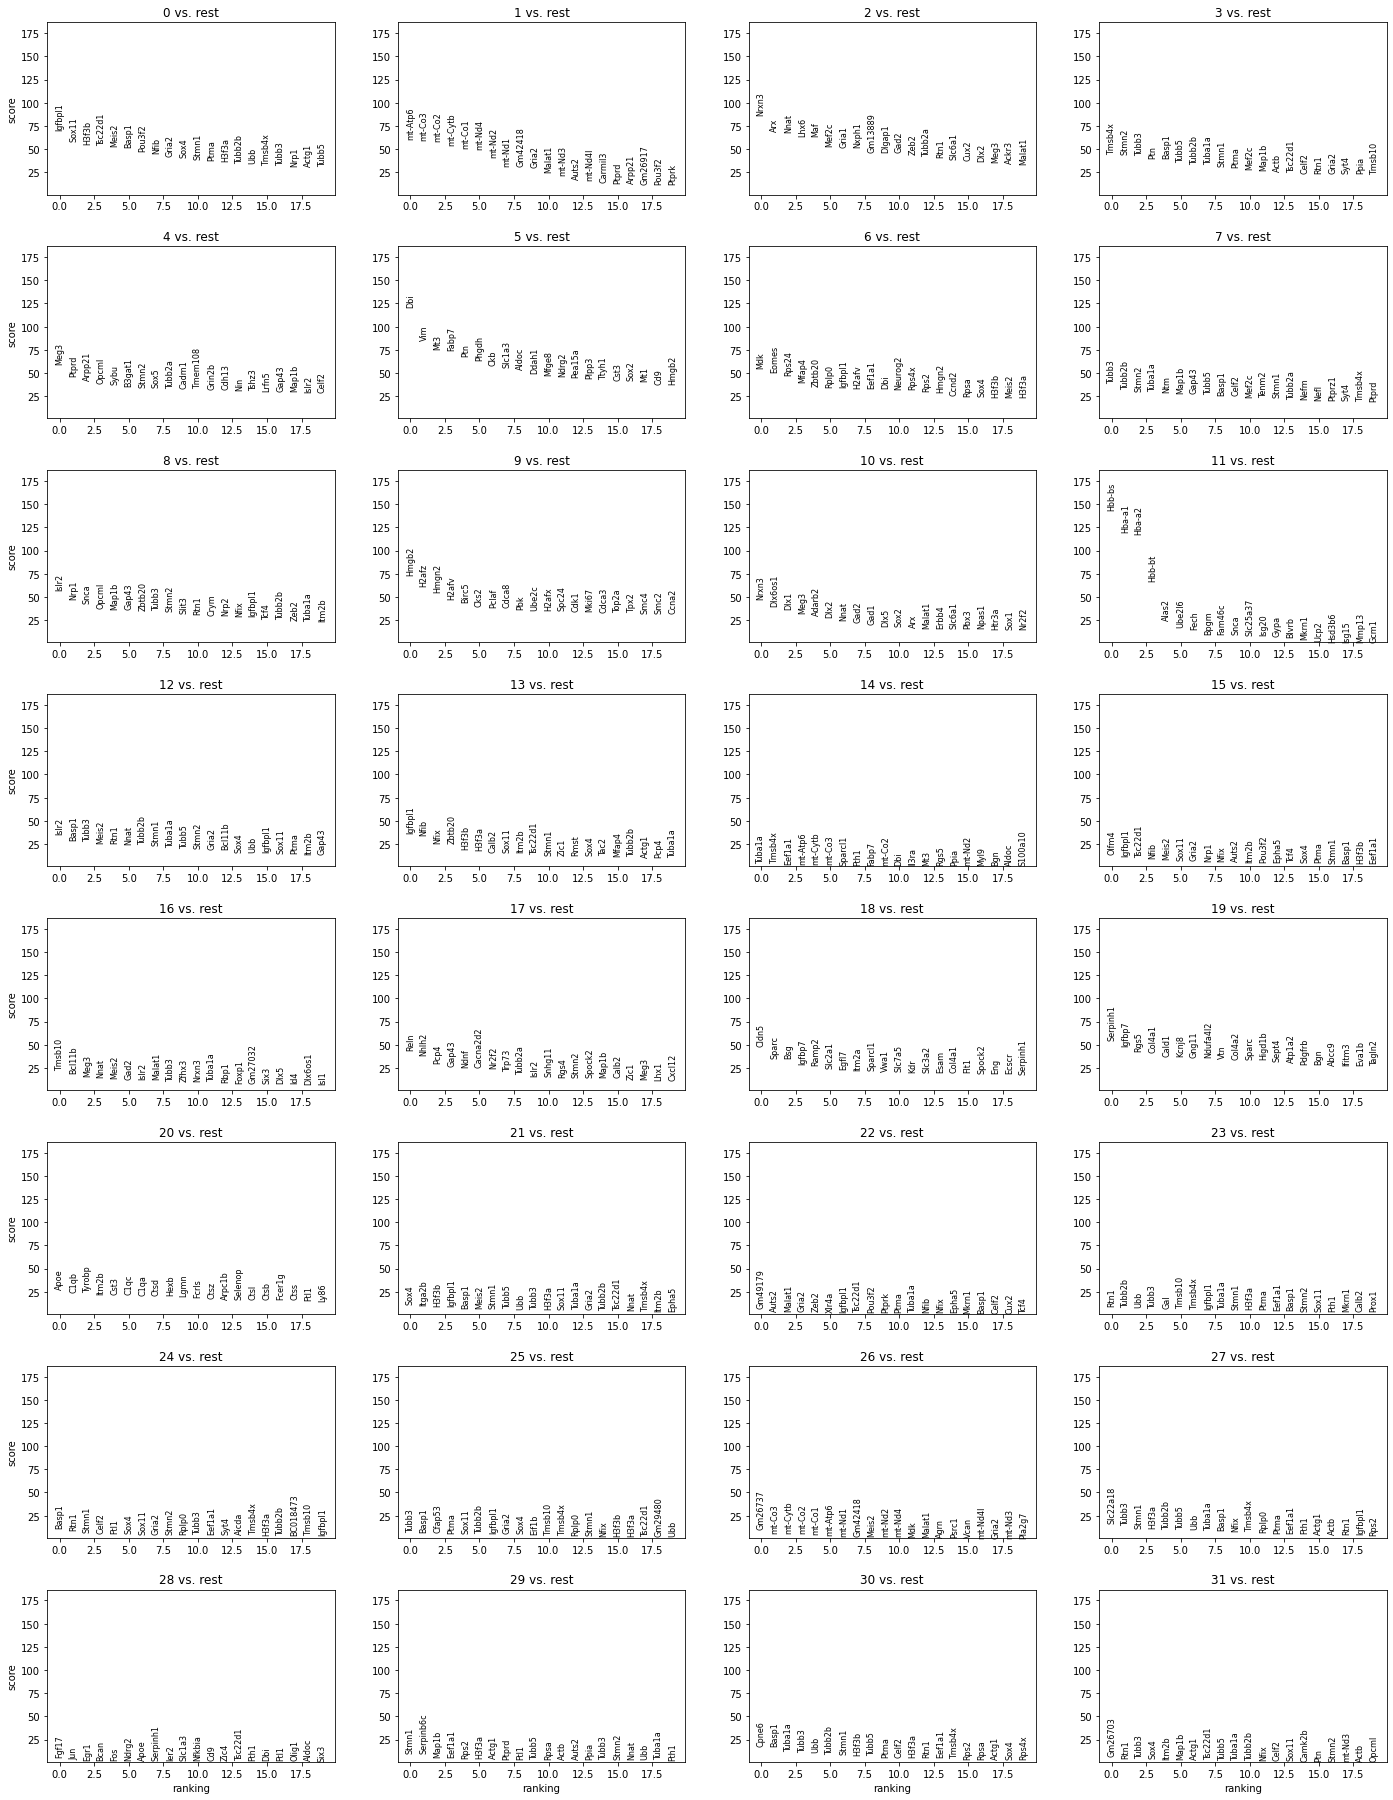

In [14]:
sc.pl.rank_genes_groups(ranked_ttest_genes)

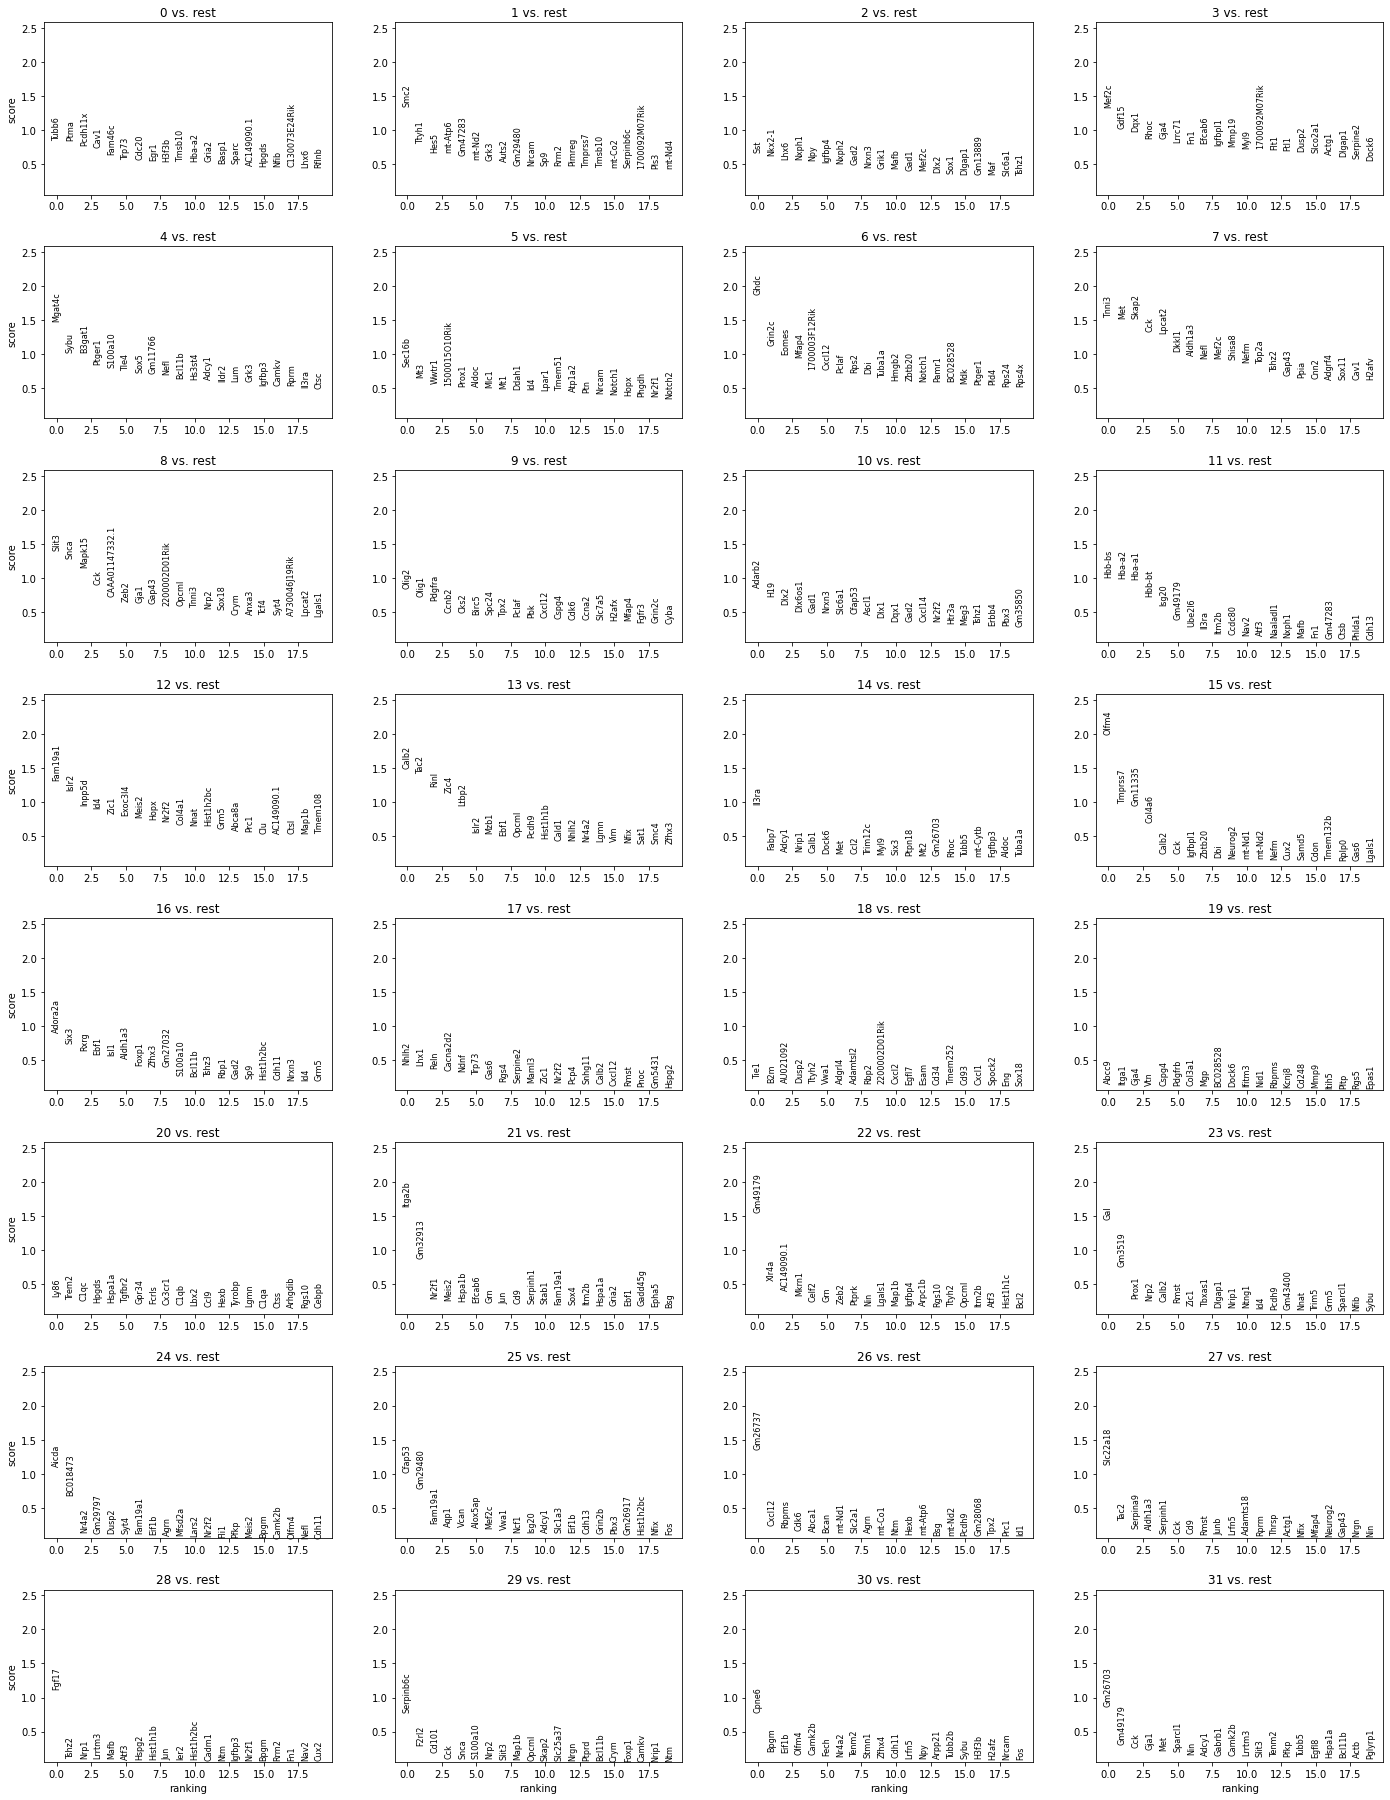

In [15]:
sc.pl.rank_genes_groups(ranked_logreg_genes)

## Step 4: Cell types?

In [16]:
#looked at cell type clusters based on this document
#https://docs.abcam.com/pdf/neuroscience/neural-markers-guide-web.pdf

#write out filtered genes to file and sort for esasy searches of markers
outputFile = '/Users/cmdb/qbb2020-answers/assignment8/filtered_genes.txt'
with open(outputFile, 'w') as out:
    genes = []
    for gene in clusters.var_names:
        genes.append(gene)
    genes.sort()
    for gene in genes:
            out.write(str(gene)+'\n')
print(clusters.var_names)


Index(['Sox17', 'Oprk1', 'Ptpn18', '1500015O10Rik', 'Col3a1', 'Slc40a1',
       'Gm28826', 'Cavin2', 'Gm553', 'Nrp2',
       ...
       'mt-Co1', 'mt-Co2', 'mt-Atp6', 'mt-Co3', 'mt-Nd3', 'mt-Nd4l', 'mt-Nd4',
       'mt-Cytb', 'AC149090.1', 'CAAA01147332.1'],
      dtype='object', length=999)


### Generate support plots


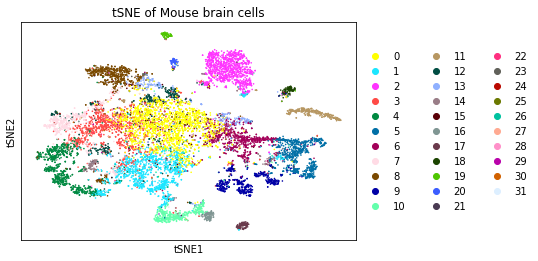

In [17]:
#cluster plots for reference
sc.pl.tsne(tsne_data,color = ['leiden'], title = "tSNE of Mouse brain cells")
#sc.pl.umap(umap_data,color = ['leiden'], title = "UMAP of Mouse brain cells")

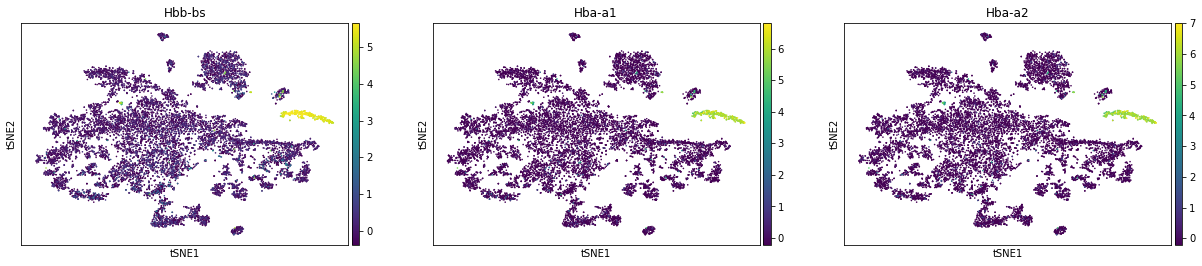

In [18]:
#erythrocytes/red blood cells
sc.pl.tsne(tsne_data,color = ['Hbb-bs', 'Hba-a1', 'Hba-a2'])
#cluster 11

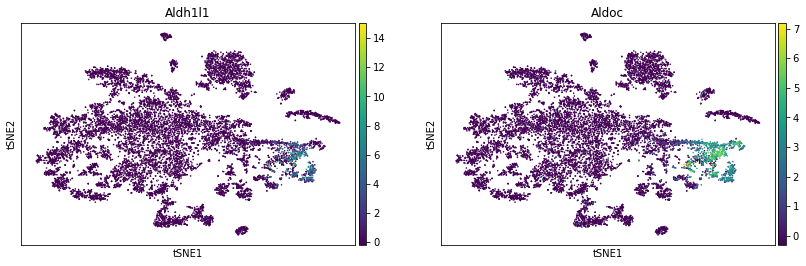

In [19]:
#Astrocytes
sc.pl.tsne(tsne_data,color = ['Aldh1l1', 'Aldoc'])
#cluster 5

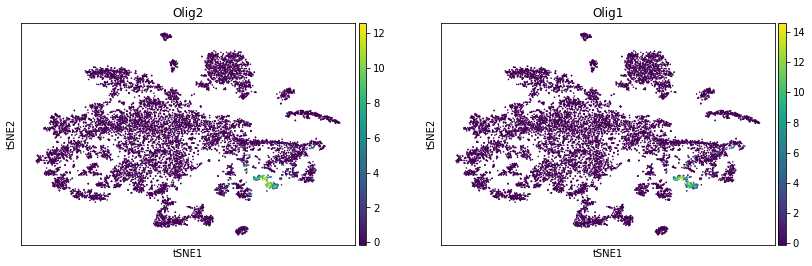

In [20]:
#oligodendrocytes: Olig2, Olig1
sc.pl.tsne(tsne_data,color = ['Olig2','Olig1'])
#cluster 9

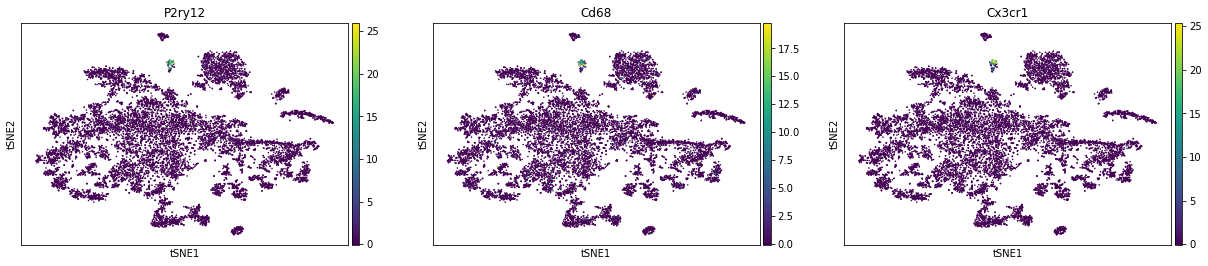

In [21]:
#microglia, resident macrophages 
sc.pl.tsne(tsne_data,color = ['P2ry12', 'Cd68', 'Cx3cr1'])
#cluster 20

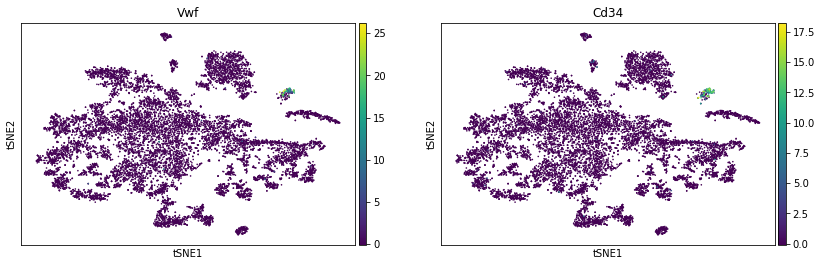

In [22]:
#endothelial cell
sc.pl.tsne(tsne_data,color = ['Vwf','Cd34'])
#cluster 18

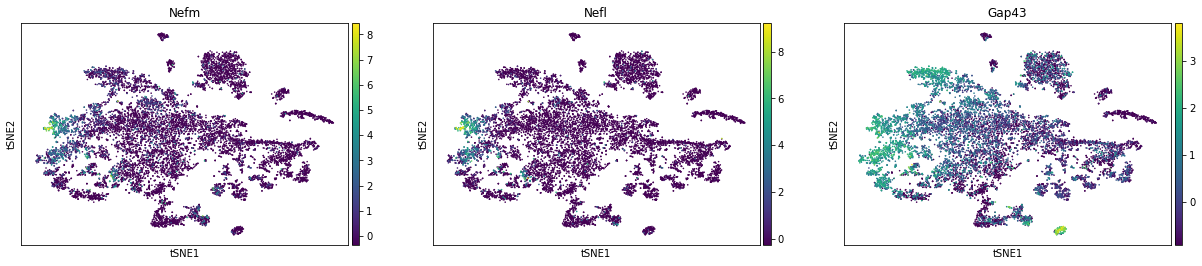

In [23]:
#mature neurons
sc.pl.tsne(tsne_data,color = ['Nefm', 'Nefl', 'Gap43'])
#Cluster 7

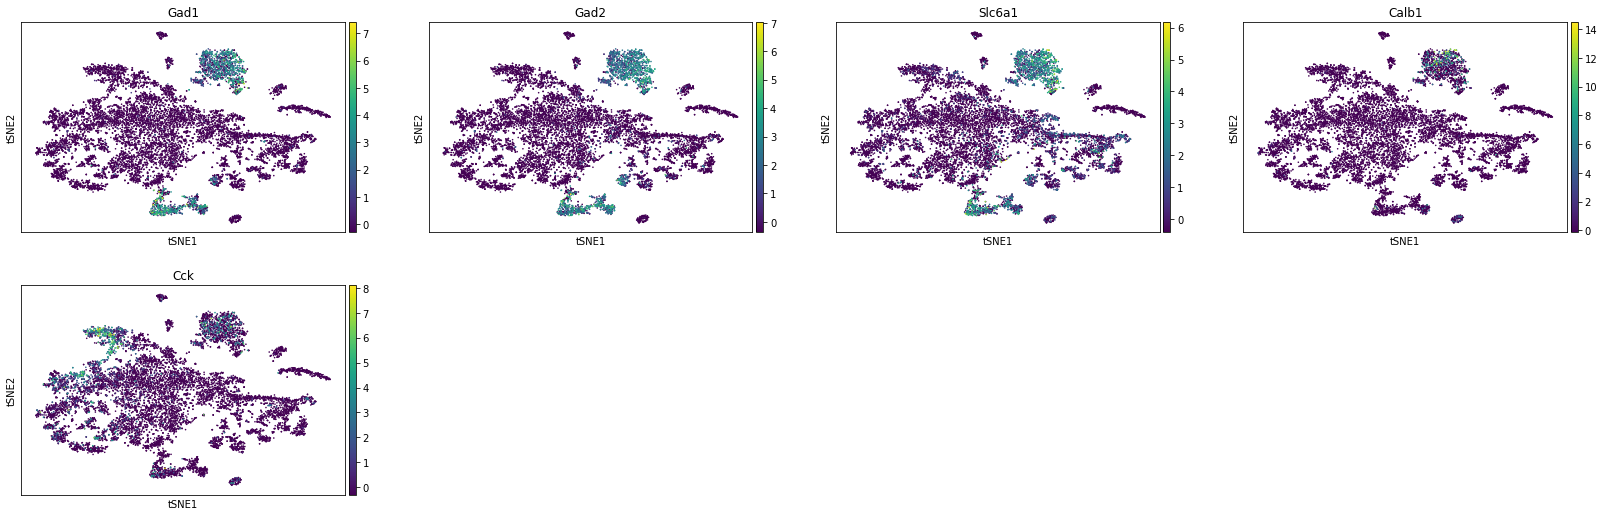

In [24]:
#GABAergic neurons
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5565173/
#Gad1 = Gad67, Gad2 = Gad65, Slc6a1 = GABA Transporter 1
sc.pl.tsne(tsne_data,color = ['Gad1', 'Gad2', 'Slc6a1', 'Calb1', 'Cck'])
#cluster 2

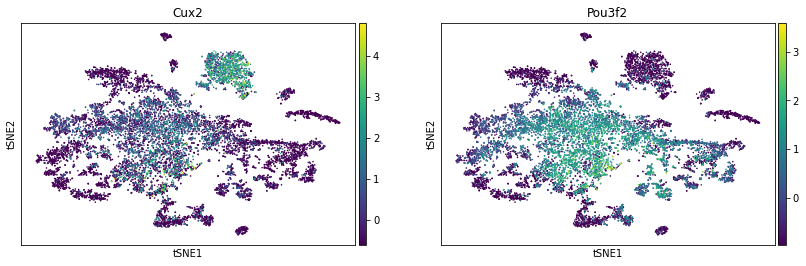

In [25]:
#cortical layer neurons
sc.pl.tsne(tsne_data,color = ['Cux2', 'Pou3f2'])
#cluster 0

### Final tSNE/UMAP plots with labeled types

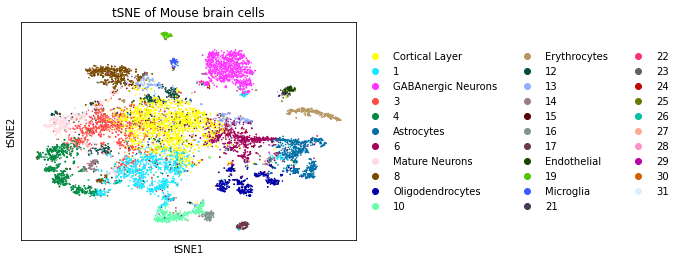

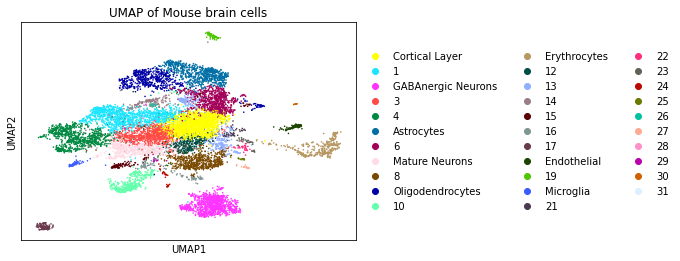

In [26]:
#generate final tSNE and uMAP plots with labeled cell types
new_cluster_names = [
    'Cortical Layer', '1','GABAnergic Neurons', '3', '4', 'Astrocytes','6','Mature Neurons',
    '8', 'Oligodendrocytes', '10','Erythrocytes', '12', '13', '14', '15', '16','17',
    'Endothelial', '19', 'Microglia', '21','22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
tsne_data.rename_categories('leiden', new_cluster_names)
sc.pl.tsne(tsne_data,color = ['leiden'], title = "tSNE of Mouse brain cells")
umap_data.rename_categories('leiden', new_cluster_names)
sc.pl.umap(umap_data,color = ['leiden'], title = "UMAP of Mouse brain cells")
